# Position of quasars

### Part 1


Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_{i}|\mu, \sigma)$.\
Plot each of the individual likelihoods separately. Also plot their product (i.e. the likelihood of the dataset {$x_{i}$}). Make sure the x grid has enough points.\
Just read off the maximum likelihood solution (e.g. using np.argsort)
Compare it with the MLE estimator derived above

Generate N data following Gaussian distribution

In [968]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy

In [969]:
mu    = 1
sigma = 0.2
N     = int(1e4)

In [970]:
data = norm.rvs(loc=mu, scale=sigma, size=N)

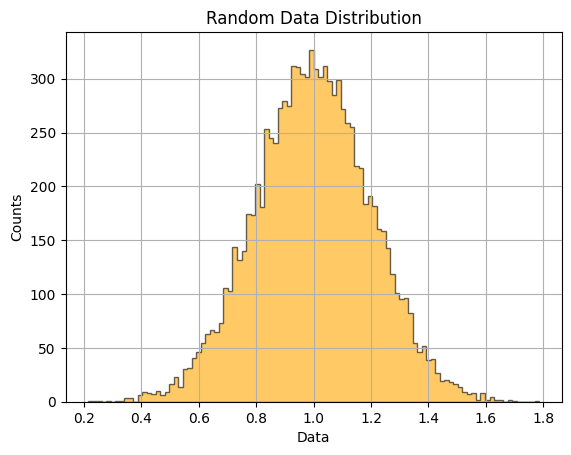

In [978]:
counts, bins, _ = plt.hist(data, bins=int(np.sqrt(data.shape[0])), histtype='stepfilled', color='orange',alpha=0.6, edgecolor='black')
plt.title('Random Data Distribution')
plt.ylabel('Counts')
plt.xlabel('Data')
plt.grid()

$ln(\mathcal{L}(\vec{x}|\mu, \sigma)) = ln(P(\vec{x}|\mu, \sigma)) = ln(\prod_{i=1}^{N} p(x_i|\mu, \sigma)) = \sum_{i=1}^{N} p(x_i|\mu, \sigma)$

In [979]:
def pdf(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-((x-mu)**2)/(2*sigma**2))

Compute the Likelihood for every data point

In [980]:
mus = np.linspace(0,2,int(N/10))

In [ ]:
Likelihoods_xi = np.array([(pdf(data, m, sigma)) for m in mus])
Likelihoods_mu = np.array([np.sum((pdf(data, m, sigma))) for m in mus])
logl_xi = np.array([np.log(pdf(data, m, sigma))for m in mus])
logl_mu = np.array([np.sum(np.log(pdf(data, m, sigma))) for m in mus])

ok!
ok!
ok!


<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_1872\1556358540.py:3: SyntaxWarning: invalid escape sequence '\m'
  axs[0][0].plot(mus, Likelihoods_mu,linestyle='--', color='blue',label=f'$ln(L)(\mu) - mu = {mu}$', linewidth=2)
C:\Users\ricca\AppData\Local\Temp\ipykernel_1872\1556358540.py:11: SyntaxWarning: invalid escape sequence '\m'
  axs[0][1].scatter(data, Likelihoods_xi[i],marker='.',label=f'$ln(L)(\mu) - mu = {mu}$')
C:\Users\ricca\AppData\Local\Temp\ipykernel_1872\1556358540.py:17: SyntaxWarning: invalid escape sequence '\m'
  axs[1][0].plot(mus, logl_mu,linestyle='--', color='blue'

Text(0.5, 1.0, '$\\ln(\\mathcal{L}(\\vec{x}|\\vec{\\mu}, \\sigma))(x)$')

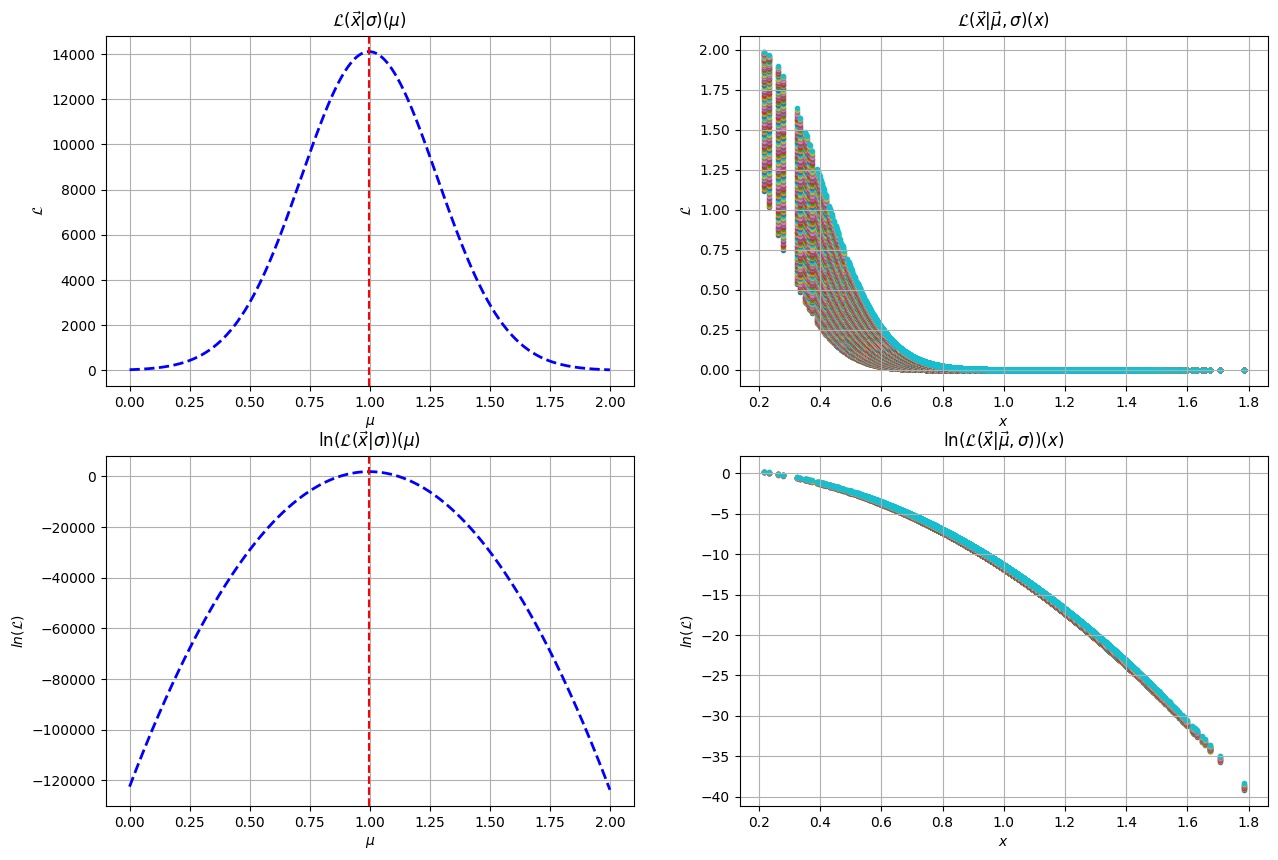

In [986]:
fig , axs = plt.subplots(2,2,figsize=(15,10))

axs[0][0].plot(mus, Likelihoods_mu,linestyle='--', color='blue',label=f'$ln(L)(\mu) - mu = {mu}$', linewidth=2)
axs[0][0].set_ylabel(r'$\mathcal{L}$')
axs[0][0].set_xlabel(r'$\mu$')
axs[0][0].axvline(mus[Likelihoods_mu.argmax()],0,1,color='red',linestyle='--')
axs[0][0].grid()
axs[0][0].set_title(r'$\mathcal{L}(\vec{x}|\sigma)(\mu)$')

for i in range(mus[::10].shape[0]):
    axs[0][1].scatter(data, Likelihoods_xi[i],marker='.',label=f'$ln(L)(\mu) - mu = {mu}$')
axs[0][1].set_ylabel(r'$\mathcal{L}$')
axs[0][1].set_xlabel(r'$x$')
axs[0][1].grid()
axs[0][1].set_title(r'$\mathcal{L}(\vec{x}|\vec{\mu}, \sigma)(x)$')

axs[1][0].plot(mus, logl_mu,linestyle='--', color='blue',label=f'$ln(L)(\mu) - mu = {mu}$', linewidth=2)
axs[1][0].set_ylabel(r'$ln(\mathcal{L})$')
axs[1][0].set_xlabel(r'$\mu$')
axs[1][0].grid()
axs[1][0].axvline(mus[logl_mu.argmax()],0,1,color='red',linestyle='--')
axs[1][0].set_title(r'$\ln(\mathcal{L}(\vec{x}|\sigma))(\mu)$')

for i in range(mus[:10].shape[0]):
    axs[1][1].scatter(data, logl_xi[i],marker='.',label=f'$ln(L)(\mu) - mu = {mu}$')
axs[1][1].set_ylabel(r'$ln(\mathcal{L})$')
axs[1][1].set_xlabel(r'$x$')
axs[1][1].grid()
axs[1][1].set_title(r'$\ln(\mathcal{L}(\vec{x}|\vec{\mu}, \sigma))(x)$')

Compare extracted value by requiring that $\frac{d}{d\mu}ln(\mathcal{L}) = 0$ with the estimator $\hat{\mu} = \frac{1}{N} \sum_{i}^{N} x_{i}$

In [991]:
mu_est = data.sum()/data.shape[0]

In [992]:
mu_MLE = mus[logl_mu.argmax()]

In [993]:
print(f'Mu difference: {((np.abs(mu_est - (mu_MLE)))/mus[logl_mu.argmax()] * 100):.2} %')

Mu difference: 0.052 %


### Part 2
Check the Fisher matrix error estimate makes sense 
1. do a rough $2^{\text{nd}}$ order differentation of our log-likelihood function with np.diff
2. divide through by our $\Delta\theta^{2}$ to get the correct normalization,
3. multiply by -1
4. then take the square root.
5. Compare with the Fisher matrix error derived above
6. Plot a Gaussian at the measured with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees)

Compute $\frac{d ln(\mathcal{L})}{d\mu}$ and $\frac{d^{2}ln(\mathcal{L})}{d\mu^{2}}$

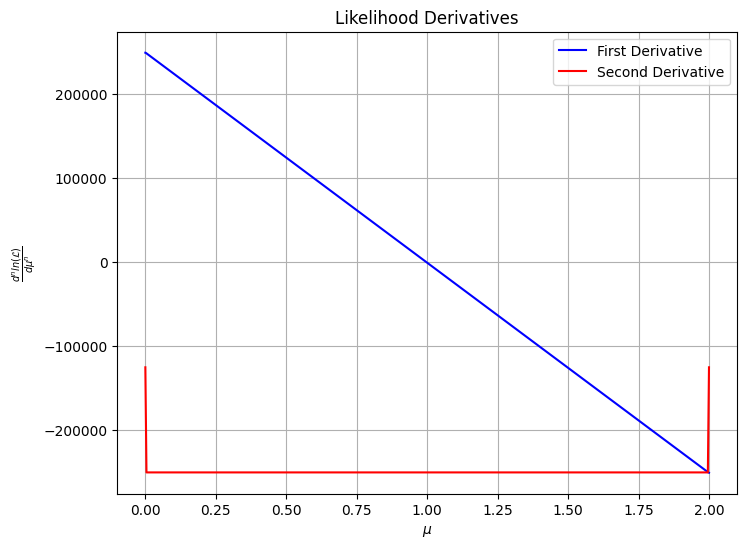

In [994]:
fst = np.gradient(logl_mu, mus)
snd = np.gradient(fst, mus)
# Plot the function and its derivatives
plt.figure(figsize=(8, 6))
plt.plot(mus, fst, label="First Derivative", color='blue')
plt.plot(mus, snd, label="Second Derivative", color='red')
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\frac{d^{n}ln(\mathcal{L})}{d\mu^{n}}$")
plt.legend()
plt.title("Likelihood Derivatives")
plt.grid()

Estimator for error mean $\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}$

In [995]:
sigma_est   = sigma / np.sqrt(N)

In [996]:
sigma_MLE = np.sqrt(1/(-1. * snd[logl_mu.argmax()]))

In [997]:
print(f'Sigma difference : {(np.abs(sigma_est-sigma_MLE)/sigma_MLE*100)} %')

Sigma difference : 7.741203511547101e-12 %


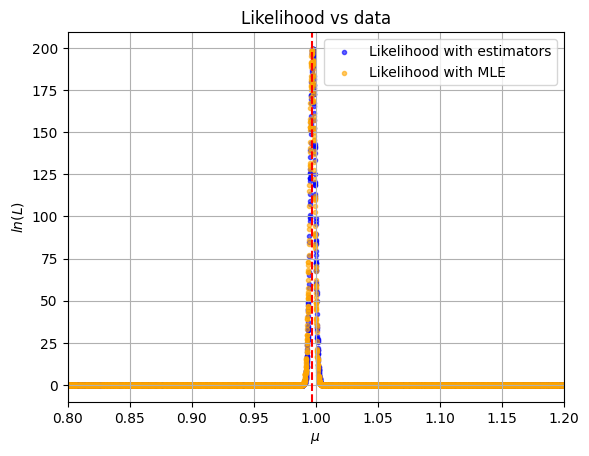

In [998]:
plt.scatter(data,pdf(data, mu_est, sigma_est),marker='.',color='blue',label='Likelihood with estimators',alpha=0.6)
plt.scatter(data,pdf(data, mu_MLE, sigma_MLE),marker='.',color='orange',label='Likelihood with MLE',alpha=0.6)
plt.grid()
plt.ylabel(r'$ln(L)$')
plt.xlabel(r'$\mu$')
plt.title(r'Likelihood vs data')
plt.axvline(mus[logl_mu.argmax()],0,1,color='red',linestyle='--')
plt.xlim([mu-sigma,mu+sigma])
plt.legend()

### Part 3 (optional)
Let's make our model more realistic. \
Our measurements were taken in different nights, where the sky behaved differently (i.e. errors are *heteoscedastic*).\
Let's assume that each measurment has a $\sigma_i$ that is normally distributed with mean 0.2 and standard deviation 0.5 \
Generalize your code from above to this case

Sigma distribution

In [999]:
sigmas = norm.rvs(loc=0.2, scale=0.05, size=N) # Normally distributed errors
datas  = np.array([norm.rvs(loc=1, scale=np.abs(s), size=1) for s in sigmas]) #Normally distributed data, each one with a random sigma

Text(0.5, 1.0, 'Data Distribution')

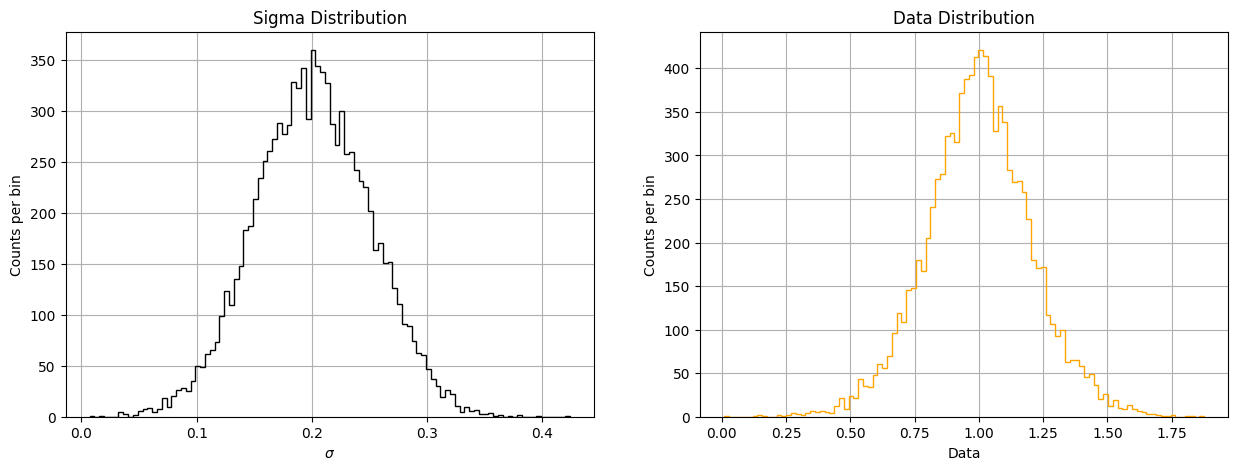

In [1000]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

axs[0].hist(sigmas, int(np.sqrt(sigmas.shape[0])), histtype='step', color='black', label='Sigma Distribution');
axs[0].set_xlabel(r'$\sigma$')
axs[0].set_ylabel('Counts per bin')
axs[0].grid()
axs[0].set_title('Sigma Distribution')

axs[1].hist(datas, int(np.sqrt(datas.shape[0])), histtype='step', color='orange', label='Data Distribution');
axs[1].set_xlabel('Data')
axs[1].set_ylabel('Counts per bin')
axs[1].grid()
axs[1].set_title('Data Distribution')


Generate some means and compute $ln(\mathcal{L})$ for every value of $\mu$

In [1001]:
muss = np.linspace(0,2,N)

In [1002]:
LogL = np.array([np.sum(np.log(pdf(data, m, s))) for s,m in zip(sigmas,muss)])

C:\Users\ricca\AppData\Local\Temp\ipykernel_1872\308241623.py:1: RuntimeWarning: divide by zero encountered in log
  LogL = np.array([np.sum(np.log(pdf(data, m, s))) for s,m in zip(sigmas,muss)])


<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_1872\2497474748.py:1: SyntaxWarning: invalid escape sequence '\m'
  plt.scatter(muss, LogL,marker='.', color='blue',label=f'$ln(L)(\mu) - mu = {mu}$', alpha=0.6)


Text(0.5, 1.0, 'Likelihood as a function of $\\mu$')

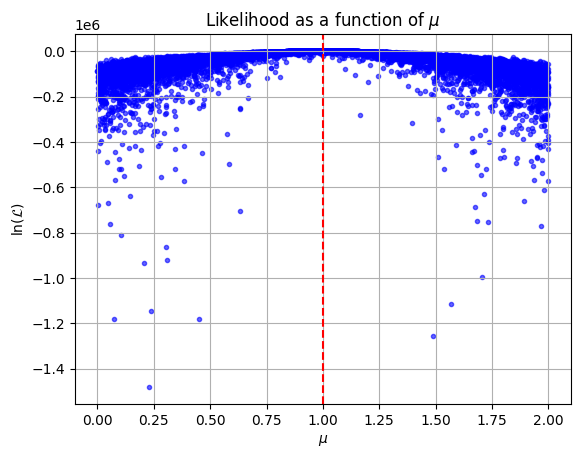

In [1003]:
plt.scatter(muss, LogL,marker='.', color='blue',label=f'$ln(L)(\mu) - mu = {mu}$', alpha=0.6)
plt.axvline(muss[LogL.argmax()],0,1,color='red',linestyle='--')
plt.grid()
plt.ylabel(r'$\ln(\mathcal{L})$')
plt.xlabel(r'$\mu$')
plt.title(r'Likelihood as a function of $\mu$')

Confront the MLE estimator value $\hat{\mu} = \frac{\sum_{i=1}^{N}(x_i/\sigma_i^{2})}{\sum_{i=1}^{N}(1/\sigma_i^{2})}$ with the numerical value

In [1004]:
MLE_mu_est = np.sum(1/sigmas**2 * datas) / np.sum(1/sigmas**2)

In [1005]:
MLE_mu_num = muss[LogL.argmax()] 

In [1006]:
print(f'Mean difference : {int(np.abs(MLE_mu_est-MLE_mu_num)/MLE_mu_est*100)} %')

Mean difference : 99 %


Compute $\frac{d ln(\mathcal{L})}{d\mu}$ and $\frac{d^{2}ln(\mathcal{L})}{d\mu^{2}}$

In [1013]:
from scipy.signal import savgol_filter as sav

In [1047]:
dL = sav(LogL, int(LogL.shape[0]/300) , 10, 1)
d2L = sav(LogL, int(LogL.shape[0]/300) , 10, 2)

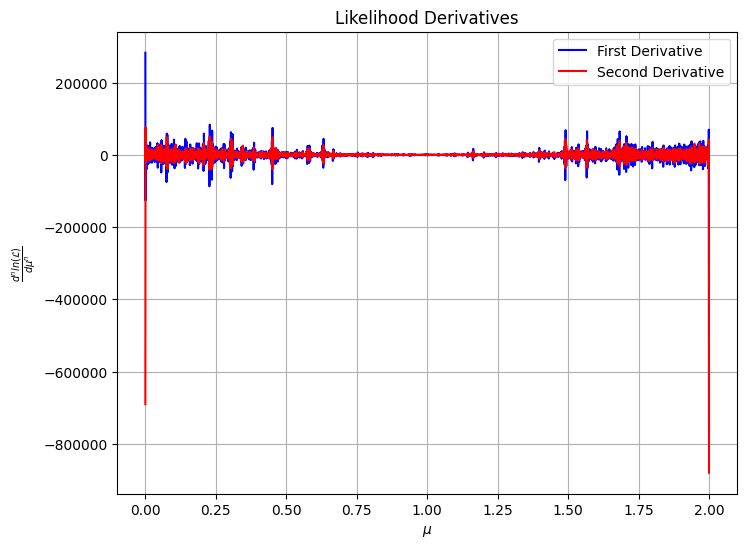

In [1048]:
# Plot the function and its derivatives
plt.figure(figsize=(8, 6))
plt.plot(muss, dL, label="First Derivative", color='blue')
plt.plot(muss, d2L, label="Second Derivative", color='red')
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\frac{d^{n}ln(\mathcal{L})}{d\mu^{n}}$")
plt.legend()
plt.title("Likelihood Derivatives")
plt.grid()

Confront the MLE estimator value $\hat{\sigma} = \sqrt{\sum_{i=1}^{N} \frac{1}{\sigma_{i}^{2}}}$ with the numerical value

In [1049]:
MLE_sigma_est = 1/np.sqrt(np.sum(np.divide(np.ones(datas.shape[0]),sigmas**2)))

In [1050]:
MLE_sigma_num = 1/np.sqrt((-1. * d2L[LogL.argmax()]))

In [1051]:
print(MLE_sigma_num, MLE_sigma_est)

0.3702011058264751 0.0016993943617842264


In [1052]:
print(f'Sigma difference : {int(np.abs(MLE_sigma_est-MLE_sigma_num)/MLE_sigma_est*100)} %')

Sigma difference : 21684 %
